In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("home.csv")

In [3]:
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
df['bedroom'].median()

4.0

In [5]:
#filling missing value with median

df['bedroom'] = df.bedroom.fillna(df.bedroom.median())

In [6]:
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


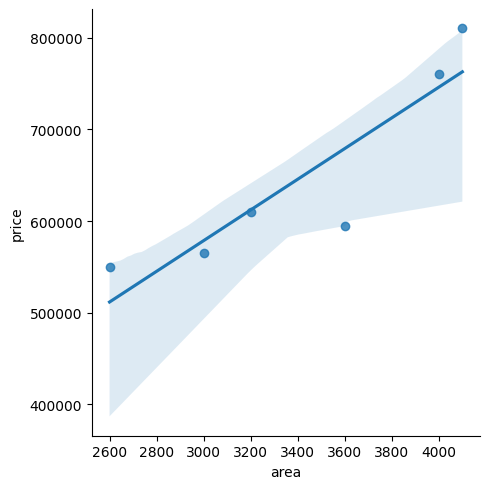

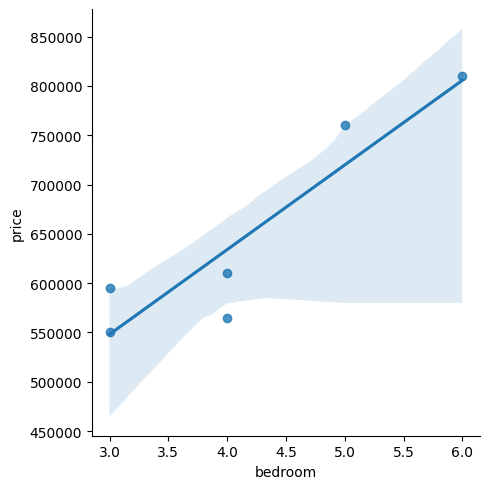

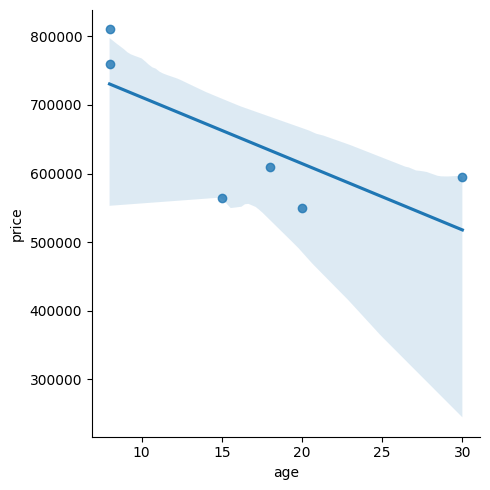

In [7]:
import seaborn as sns
sns.lmplot(x='area',y='price',data=df)
sns.lmplot(x='bedroom',y='price',data=df)
sns.lmplot(x='age',y='price',data=df)

In [8]:
reg= LinearRegression()
reg.fit(df[['area','bedroom','age']],df.price)

LinearRegression()

In [10]:
reg.intercept_

221323.0018654043

In [11]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [12]:
reg.coef_[0]*3000+reg.coef_[1]*3+reg.coef_[2]*40+reg.intercept_

498408.2515803068

In [13]:
reg.predict([[3000,3,40]])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [14]:
from sklearn.metrics import r2_score
y_original=df.price
y_predicted=reg.predict(df[['area','bedroom','age']])
r_square=r2_score(y_original,y_predicted)
print('model accuracy is ',r_square*100)

model accuracy is  95.50196399325819


In [16]:
import pickle

In [17]:
with open('model_pickle','rb') as file:
    mp=pickle.load(file)

In [20]:
x=df.area.values.reshape(-1,1)


In [21]:
mp.predict(x)

array([535394.73684211, 589342.10526316, 616315.78947368, 670263.15789474,
       724210.52631579, 737697.36842105])